In [1]:
import autolens as al
import autolens.plot as aplt
import matplotlib.pyplot as plt

In [15]:
import autolens as al
import autolens.plot as aplt

"""
To describe the deflection of light by mass, two-dimensional grids of (y,x) Cartesian
coordinates are used.
"""

grid_2d = al.Grid2D.uniform(
    shape_native=(50, 50),
    pixel_scales=0.05,  # <- Conversion from pixel units to arc-seconds.
)
"""
The lens galaxy has an elliptical isothermal mass profile and is at redshift 0.5.
"""

sie = al.mp.Isothermal(
    centre=(0.0, 0.0), ell_comps=(0.1, 0.05), einstein_radius=1.6
)

lens_galaxy = al.Galaxy(redshift=0.5, mass=sie)

print("Sie:", sie)
print("Lens galaxy:", lens_galaxy)

"""The source galaxy has an elliptical exponential light profile and is at redshift 1.0."""

exponential = al.lp.Exponential(
    centre=(0.3, 0.2),
    ell_comps=(0.05, 0.25),
    intensity=0.05,
    effective_radius=0.5,
)

source_galaxy = al.Galaxy(redshift=1.0, light=exponential)

"""
We create the strong lens using a Tracer, which uses the galaxies, their redshifts
and an input cosmology to determine how light is deflected on its path to Earth.
"""

tracer = al.Tracer.from_galaxies(
    galaxies=[lens_galaxy, source_galaxy], cosmology=al.cosmo.Planck15()
)

"""
We can use the Grid2D and Tracer to perform many lensing calculations, for example
plotting the image of the lensed source.
"""
print(tracer)

Sie: Isothermal
centre: (0.0, 0.0)
ell_comps: (0.1, 0.05)
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0
Lens galaxy: Redshift: 0.5
Mass Profiles:
Isothermal
centre: (0.0, 0.0)
ell_comps: (0.1, 0.05)
einstein_radius: 1.6
slope: 2.0
core_radius: 0.0


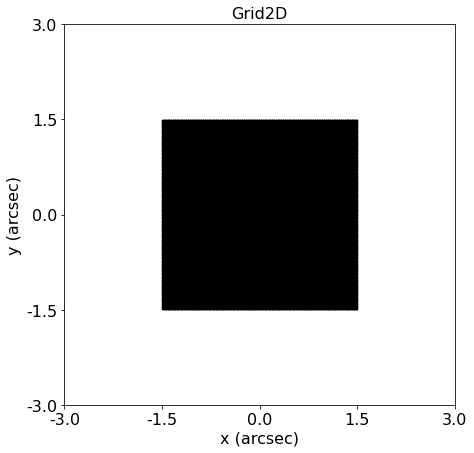

In [2]:
grid = al.Grid2D.uniform(shape_native=(300,300), pixel_scales=0.01)
aplt.Grid2DPlotter(grid=grid).figure_2d()


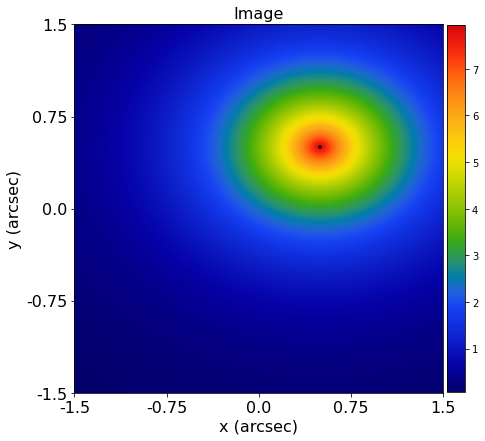

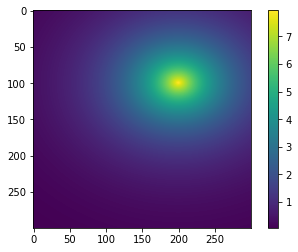

In [3]:
light_profile_1 = al.lp.Gaussian(
    centre=(0.0,0.0),
    ell_comps=(0.0, .1),
    intensity=1.0,
    sigma=0.5
)
light_profile_2 = al.lp.Sersic(
    centre=(0.5,0.5),
    ell_comps=(0,0.11),
    effective_radius=1,
    sersic_index=1,
    intensity=1.5,
)
light_profile_3 = al.lp.Chameleon(
    centre=(0.5, 0.5),
    ell_comps=(0,0.11),
    intensity=1,
    core_radius_0=0.05,
    core_radius_1=0.25
)
light_profile_4 = al.lp.Exponential(
    centre=(-0.5, 0.0),
    ell_comps=(0.0, 0.1),
    intensity=1,
    effective_radius=1
)

galaxy = al.Galaxy(
    redshift=1.5, 
    # buldge = light_profile_3,
    disk = light_profile_2
)

galaxy_plotter = aplt.GalaxyPlotter(galaxy=galaxy, grid=grid)
galaxy_plotter.figures_2d(image=True, convergence=True, potential=True)

source = galaxy.image_2d_from(grid=grid).native
plt.imshow(source)
plt.colorbar()

# galaxy_plotter.subplot_of_light_profiles(image=True)
# galaxy_plotter.figures_1d(image=True)

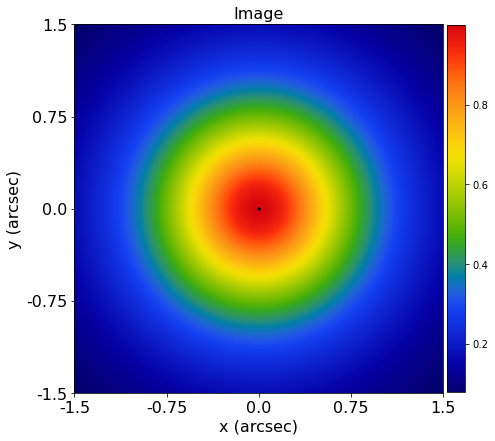

In [19]:
mass_profile_1 = al.mp.Isothermal(
    centre=(0,0), 
    ell_comps=(0,0.1), 
    einstein_radius=.6
)
mass_profile_2 = al.mp.Exponential(
    centre=(0,0), 
    ell_comps=(0,.1), 
    intensity = 1*.75, 
    effective_radius=0.75, 
    mass_to_light_ratio=.75
)
lp_2 = al.lp.Exponential(
    centre=(0,0), 
    ell_comps=(0,.1), 
    intensity = 1, 
    effective_radius=0.75,
)

lp_3 = al.lp.ElsonFreeFall(
    intensity = 1,
    effective_radius=1
)

galaxy_m = al.Galaxy(
    redshift = 0.5,
    light_1 = lp_3,
    # mass_1 = mass_profile_1
)
# print(type(mass_profile_1.angle_to_profile_grid_from(grid_angles=grid)[0]))
galaxy_plotter_m = aplt.GalaxyPlotter(galaxy_m, grid)
galaxy_plotter_m.figures_2d(image=True)

mass = galaxy_m.image_2d_from(grid=grid).native # (grid_angles=grid)[0]
# print(mass)

(300, 300)


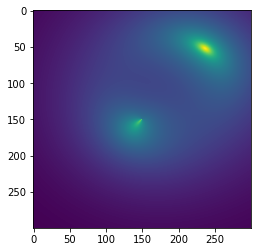

In [213]:
tracer = al.Tracer.from_galaxies(galaxies=[galaxy, galaxy_m])
traced_image = tracer.image_2d_from(grid=grid)
print(traced_image.native.shape)
plt.imshow(traced_image.native)


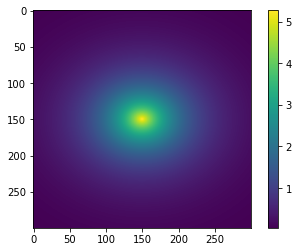

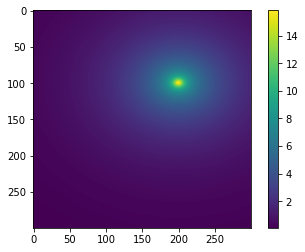

In [214]:
plt.imshow(mass)
plt.colorbar()
plt.show()

plt.imshow(source)
plt.colorbar()
plt.show()